# Flight Price Prediction

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Importing Dataset and Exploratory analysis

In [2]:
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

In [7]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
35h 35m      1
3h 25m       1
5m           1
13h 35m      1
27h 55m      1
Name: Duration, Length: 368, dtype: int64

### EDA

In [8]:
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey,format = '%d/%m/%Y').dt.day

In [9]:
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey,format = '%d/%m/%Y').dt.month

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [11]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [12]:
# Departure time is when will plane leave
# so like Date of journey we will convert departure time in hour and minutes format

df['Dep_Hour']= pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [13]:
# Now we can drop Dep_Time column
df.drop('Dep_Time',axis=1,inplace=True)

In [14]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [15]:
# Now similarly we can extract arrival time in hours and minutes

In [16]:
df['Arrival_Hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
df['Arrival_Minute']= pd.to_datetime(df.Arrival_Time).dt.minute

In [17]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [18]:
# Now droping Arrival_Time 
df.drop('Arrival_Time',axis=1,inplace=True)

In [19]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [20]:
# Converting duration column 
duration = list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0])) # Extracting Hours
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1])) # Extracting Minutes

In [21]:
# Now Checking our lists
print(duration_hours[:5])
print(duration_mins[:5])

[2, 7, 19, 5, 4]
[50, 25, 0, 25, 45]


In [22]:
# Now adding features duration_hours and duration_mins
df['Duration_hours'] = duration_hours
df['Duration_mins'] = duration_mins
df.drop('Duration',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [23]:
# Now checking total spots column
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [24]:
total_stops = list(df['Total_Stops'])
for i in range(len(total_stops)):
    if len(total_stops[i].split()) == 1:
        total_stops[i] = 0
    else:
        total_stops[i] = int(total_stops[i].split()[0])            

In [25]:
total_stops[:5]

[0, 2, 2, 1, 1]

In [26]:
df.drop('Total_Stops',axis=1,inplace=True)

In [27]:
df['Total_Stops'] = total_stops
df.head()

,Airline,Source,Destination,Route,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins,Total_Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,24,3,22,20,1,10,2,50,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,1,5,5,50,13,15,7,25,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,9,6,9,25,4,25,19,0,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,12,5,18,5,23,30,5,25,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,1,3,16,50,21,35,4,45,1


In [28]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

## Handling Categorical data

In [29]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

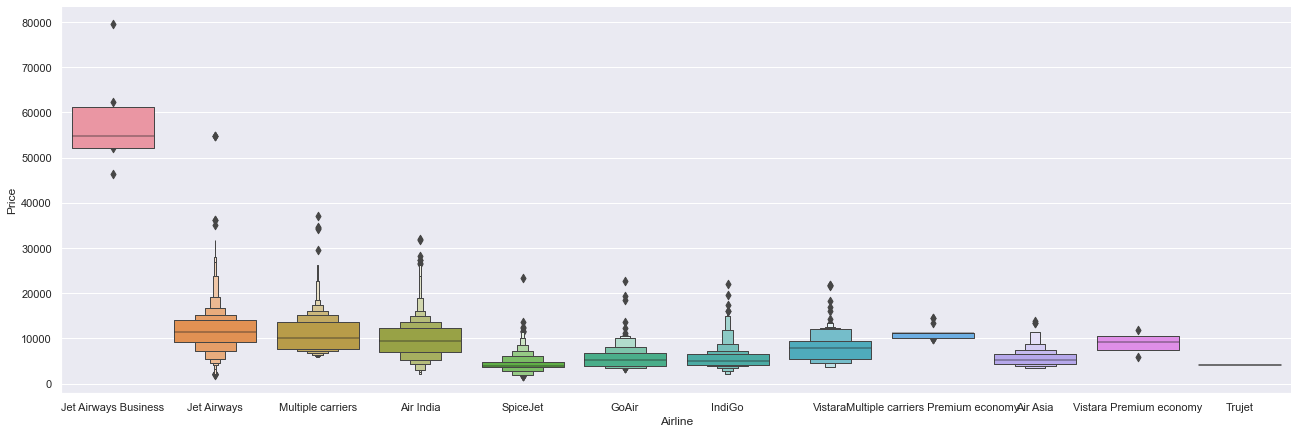

In [30]:
# Now plotting airline vs price plot for further analysis
sns.catplot(x='Airline',y='Price',data=df.sort_values(by='Price',ascending=False),kind='boxen',height=6,aspect=3)

In [31]:
# Now droping airlines that occur less then 20 times
value_counts = df['Airline'].value_counts()
to_remove = value_counts[value_counts < 20].index
new_df = df[~df.Airline.isin(to_remove)]
new_df['Airline'].value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1751
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Name: Airline, dtype: int64

In [32]:
# Now performing one hot encoding
train_data = pd.get_dummies(new_df,columns=['Airline'],drop_first=True,prefix=None)
train_data.head()

,Source,Destination,Route,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,...,Duration_hours,Duration_mins,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara
0,Banglore,New Delhi,BLR → DEL,No info,3897,24,3,22,20,1,...,2,50,0,0,0,1,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,1,5,5,50,13,...,7,25,2,1,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,9,6,9,25,4,...,19,0,2,0,0,0,1,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,12,5,18,5,23,...,5,25,1,0,0,1,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,1,3,16,50,21,...,4,45,1,0,0,1,0,0,0,0


In [33]:
train_data.shape

(10659, 21)

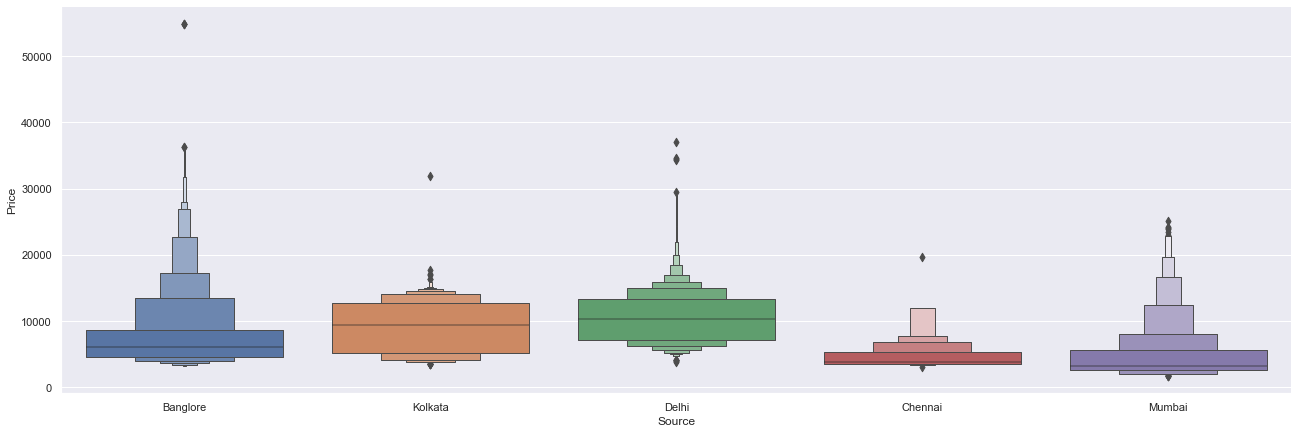

In [34]:
# Source vs price
sns.catplot(x='Source',y='Price',data=train_data,kind='boxen',height=6,aspect=3)

In [35]:
train_data = pd.get_dummies(train_data,columns=['Source'],drop_first=True)
train_data.head()

,Destination,Route,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,New Delhi,BLR → DEL,No info,3897,24,3,22,20,1,10,...,0,1,0,0,0,0,0,0,0,0
1,Banglore,CCU → IXR → BBI → BLR,No info,7662,1,5,5,50,13,15,...,0,0,0,0,0,0,0,0,1,0
2,Cochin,DEL → LKO → BOM → COK,No info,13882,9,6,9,25,4,25,...,0,0,1,0,0,0,0,1,0,0
3,Banglore,CCU → NAG → BLR,No info,6218,12,5,18,5,23,30,...,0,1,0,0,0,0,0,0,1,0
4,New Delhi,BLR → NAG → DEL,No info,13302,1,3,16,50,21,35,...,0,1,0,0,0,0,0,0,0,0


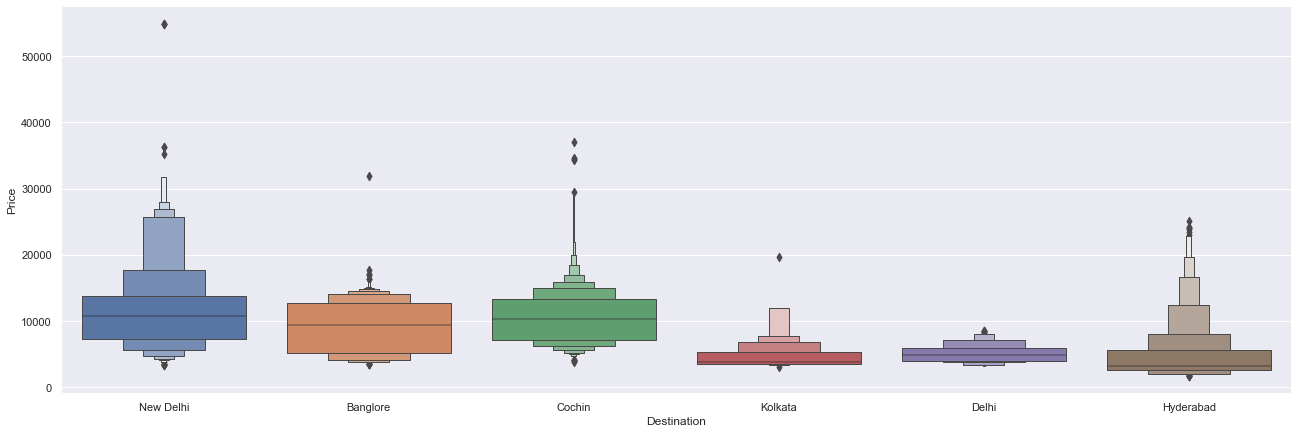

In [36]:
# destination vs price
sns.catplot(x='Destination',y='Price',data=train_data,kind='boxen',height=6,aspect=3)

In [37]:
train_data=pd.get_dummies(train_data,columns=['Destination'],drop_first=True)
train_data.head()

,Route,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,No info,3897,24,3,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,No info,7662,1,5,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,No info,13882,9,6,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,No info,6218,12,5,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,No info,13302,1,3,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [38]:
# Additional_info consits 80% of No info data
#Routes and Total_stops are same
train_data.drop(['Route','Additional_Info'],axis=1, inplace=True)

In [39]:
train_data.shape

(10659, 26)

In [40]:
train_data.head()

,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins,Total_Stops,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,7662,1,5,5,50,13,15,7,25,2,...,0,0,0,1,0,0,0,0,0,0
2,13882,9,6,9,25,4,25,19,0,2,...,0,0,1,0,0,1,0,0,0,0
3,6218,12,5,18,5,23,30,5,25,1,...,0,0,0,1,0,0,0,0,0,0
4,13302,1,3,16,50,21,35,4,45,1,...,0,0,0,0,0,0,0,0,0,1


## Test Data

In [41]:
test_data = pd.read_excel('Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [42]:
test_data.shape

(2671, 10)

In [43]:
test_data['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [44]:
# Now droping airlines that occur less then 20 times
value_counts = test_data['Airline'].value_counts()
to_remove = value_counts[value_counts < 20].index
test_data = test_data[~test_data.Airline.isin(to_remove)]
test_data['Airline'].value_counts()

Jet Airways          897
IndiGo               511
Air India            440
Multiple carriers    347
SpiceJet             208
Vistara              129
Air Asia              86
GoAir                 46
Name: Airline, dtype: int64

In [45]:
# EDA
test_data['Journey_Day'] = pd.to_datetime(test_data.Date_of_Journey,format = '%d/%m/%Y').dt.day
test_data['Journey_Month'] = pd.to_datetime(test_data.Date_of_Journey,format = '%d/%m/%Y').dt.month
# Departure time is when will plane leave
# so like Date of journey we will convert departure time in hour and minutes format
test_data['Dep_Hour']= pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_Minute'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
# Now we can drop Dep_Time column
test_data.drop('Dep_Time',axis=1,inplace=True)
test_data['Arrival_Hour'] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data['Arrival_Minute']= pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop('Arrival_Time',axis=1,inplace=True)
# Converting duration column 
duration = list(test_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0])) # Extracting Hours
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1])) # Extracting Minutes
# Now adding features duration_hours and duration_mins
test_data['Duration_hours'] = duration_hours
test_data['Duration_mins'] = duration_mins
test_data.drop('Duration',axis=1,inplace=True)
total_stops = list(test_data['Total_Stops'])
for i in range(len(total_stops)):
    if len(total_stops[i].split()) == 1:
        total_stops[i] = 0
    else:
        total_stops[i] = int(total_stops[i].split()[0])  
test_data.drop('Total_Stops',axis=1,inplace=True)
test_data['Total_Stops'] = total_stops
# Now performing one hot encoding
test_data = pd.get_dummies(test_data,columns=['Airline'],drop_first=True)
test_data = pd.get_dummies(test_data,columns=['Source'],drop_first=True)
test_data=pd.get_dummies(test_data,columns=['Destination'],drop_first=True)
test_data.drop(['Route','Additional_Info'],axis=1, inplace=True)

In [46]:
test_data.columns

Index(['Date_of_Journey', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_hours',
       'Duration_mins', 'Total_Stops', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [47]:
train_data.columns

Index(['Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Minute',
       'Arrival_Hour', 'Arrival_Minute', 'Duration_hours', 'Duration_mins',
       'Total_Stops', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Vistara', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [48]:
test_data.drop('Date_of_Journey',axis=1,inplace=True)
test_data.shape

(2664, 25)

### Feature Selection

<AxesSubplot:>

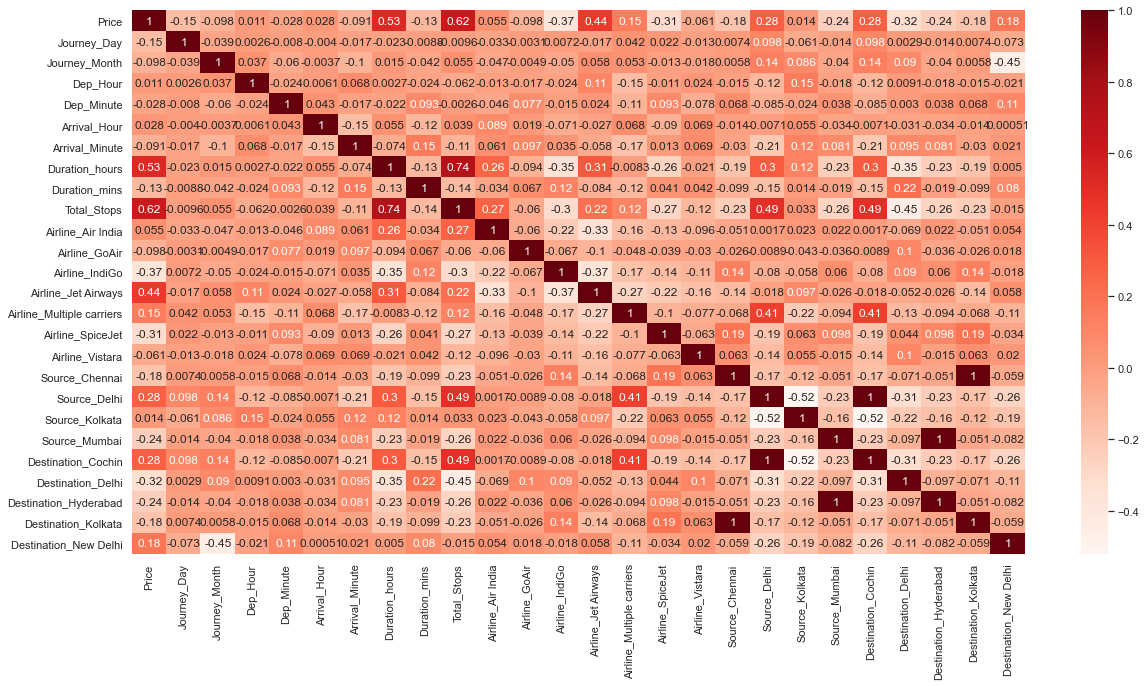

In [49]:
# Finding correlation among features using heatmap.
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),annot=True,cmap='Reds')

In [50]:
X = train_data.drop('Price',axis=1)
y = train_data.Price

In [51]:
# Feature selection using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [52]:
selection.feature_importances_

array([0.15508459, 0.05699101, 0.02472681, 0.02300437, 0.02945533,
       0.02013643, 0.1429268 , 0.01845619, 0.22140359, 0.01753664,
       0.00167811, 0.01299186, 0.15613564, 0.02330407, 0.00240758,
       0.0062901 , 0.00056419, 0.01198261, 0.0036804 , 0.00895324,
       0.01360848, 0.01601386, 0.00571332, 0.00054504, 0.02640975])

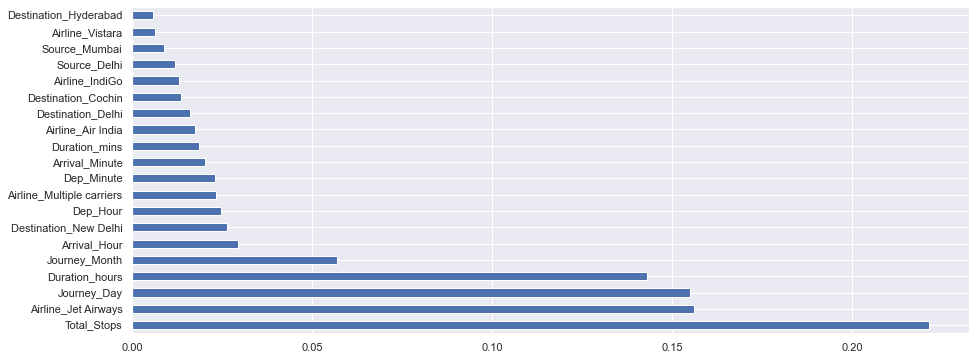

In [53]:
# For better visualization plotting bar chart
plt.figure(figsize=(15,6))
feat_importance= pd.Series(selection.feature_importances_,index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

In [55]:
def find_best_model(x,y):
    algos = {
        'LinearRegression':{
            'model' : LinearRegression(),
            'params':{
                'normalize': [True,False]
            }
        },
        'xgboost' : {
            'model' : XGBRegressor(),
            'params':{
                'min_child_weight':[i for i in range(1,6)],
                'colsample_bytree': [0.5,0.6,0.7,0.8,0.9,1]
            }
        },
        'RandomForest':{
            'model': RandomForestRegressor(),
            'params':{
                'n_estimators': [10,20,40,60,],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [5,10,15,20],
            }
        }
    }
    scores=[]
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=5)
    from sklearn.model_selection import GridSearchCV
    for algo_names,algo_df in algos.items():
        gs = GridSearchCV(algo_df['model'],algo_df['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model_name': algo_names,
            'best_param': gs.best_params_,
            'best_score': gs.best_score_
        })
    return pd.DataFrame(scores,columns=['model_name','best_param','best_score'])

In [56]:
find_best_model(X,y)

C:\Users\Priyank\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Priyank\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Priyank\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_base.py", line 547, in fit
    linalg.lstsq(X, y)
  File "C:\Users\Priyank\AppData\Roaming\Python\Python38\site-packages\scipy\linalg\basic.py", line 1221, in lstsq
    raise LinAlgError("SVD did not converge in Linear Least Squares")
numpy.linalg.LinAlgError: SVD did not converge in Linear Least Squares

  warnings.warn("Estimator fit failed. The score on this train-test"


,model_name,best_param,best_score
0,LinearRegression,{'normalize': False},0.611646
1,xgboost,"{'colsample_bytree': 0.6, 'min_child_weight': 3}",0.850537
2,RandomForest,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.839591


In [57]:
# Now XGBoost Performs the best with the above parameters
from xgboost import XGBRegressor
xb = XGBRegressor(colsample_bytree=0.6,min_child_weight=3)

In [58]:
X.rename(columns={
    'Airline_Air India':'Airline_Air_India',
    'Airline_Multiple carriers':'Airline_Multiple_carriers',
    'Airline_Jet Airways':'Airline_Jet_Airways',
    'Destination_New Delhi':'Destination_New_Delhi',
},inplace=True)

In [59]:
xb.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
test_data.rename(columns={
    'Airline_Air India':'Airline_Air_India',
    'Airline_Multiple carriers':'Airline_Multiple_carriers',
    'Airline_Jet Airways':'Airline_Jet_Airways',
    'Destination_New Delhi':'Destination_New_Delhi',
},inplace=True)

In [63]:
X.columns

Index(['Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Minute',
       'Arrival_Hour', 'Arrival_Minute', 'Duration_hours', 'Duration_mins',
       'Total_Stops', 'Airline_Air_India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet_Airways', 'Airline_Multiple_carriers', 'Airline_SpiceJet',
       'Airline_Vistara', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New_Delhi'],
      dtype='object')

In [64]:
test_data.columns

Index(['Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Minute',
       'Arrival_Hour', 'Arrival_Minute', 'Duration_hours', 'Duration_mins',
       'Total_Stops', 'Airline_Air_India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet_Airways', 'Airline_Multiple_carriers', 'Airline_SpiceJet',
       'Airline_Vistara', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New_Delhi'],
      dtype='object')

In [71]:
test_data.shape

(2664, 25)

In [65]:
# Now predicting prices for first 10 samples of test data
prediction_sample = xb.predict(test_data[:10])

In [66]:
sample_df = pd.concat([test_data[:10],pd.Series(prediction_sample,name='Price')],axis=1)
sample_df

,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins,Total_Stops,Airline_Air_India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New_Delhi,Price
0,6,6,17,30,4,25,10,55,1,0,...,0,1,0,0,1,0,0,0,0,11279.891602
1,12,5,6,20,10,20,4,0,1,0,...,0,0,1,0,0,0,0,0,0,4496.697266
2,21,5,19,15,19,0,23,45,1,0,...,0,1,0,0,1,0,0,0,0,13946.846680
3,21,5,8,0,21,0,13,0,1,0,...,0,1,0,0,1,0,0,0,0,10747.508789
4,24,6,23,55,2,45,2,50,0,0,...,0,0,0,0,0,1,0,0,0,3613.685059
5,12,6,18,15,12,35,18,20,1,0,...,0,1,0,0,1,0,0,0,0,10857.041992
6,12,3,7,30,22,35,15,5,1,1,...,0,0,0,0,0,0,0,0,1,9445.836914
7,1,5,15,15,20,30,5,15,1,0,...,0,0,1,0,0,0,0,0,0,6130.655762
8,15,3,10,10,12,55,2,45,0,0,...,0,0,1,0,0,0,0,0,0,4704.961426
9,18,5,16,30,22,35,6,5,1,0,...,0,0,1,0,0,0,0,0,0,12978.651367


In [67]:
# saving the model for future use
import joblib
file = 'flight_model.sav'
joblib.dump(xb,file)

['flight_model.sav']

In [68]:
import joblib
model = joblib.load('flight_model.sav')

In [69]:
cols = model.get_booster().feature_names

In [70]:
cols

['Journey_Day',
 'Journey_Month',
 'Dep_Hour',
 'Dep_Minute',
 'Arrival_Hour',
 'Arrival_Minute',
 'Duration_hours',
 'Duration_mins',
 'Total_Stops',
 'Airline_Air_India',
 'Airline_GoAir',
 'Airline_IndiGo',
 'Airline_Jet_Airways',
 'Airline_Multiple_carriers',
 'Airline_SpiceJet',
 'Airline_Vistara',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Destination_New_Delhi']

In [89]:
sample = test_data.iloc[[0]].values

In [92]:
sample

array([[ 6,  6, 17, 30,  4, 25, 10, 55,  1,  0,  0,  0,  1,  0,  0,  0,
         0,  1,  0,  0,  1,  0,  0,  0,  0]], dtype=int64)

In [95]:
x= np.array([[i for i in range(1,26)]])
d = pd.DataFrame(x,columns=['Journey_Day','Journey_Month','Dep_Hour','Dep_Minute','Arrival_Hour','Arrival_Minute','Duration_hours','Duration_mins','Total_Stops','Airline_Air_India','Airline_GoAir','Airline_IndiGo','Airline_Jet_Airways','Airline_Multiple_carriers','Airline_SpiceJet','Airline_Vistara','Source_Chennai','Source_Delhi','Source_Kolkata','Source_Mumbai','Destination_Cochin','Destination_Delhi','Destination_Hyderabad','Destination_Kolkata','Destination_New_Delhi'])
d

,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins,Total_Stops,Airline_Air_India,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New_Delhi
0,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25


In [76]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

In [77]:
columns=['Journey_Day','Journey_Month','Dep_Hour','Dep_Minute','Arrival_Hour','Arrival_Minute','Duration_hours','Duration_mins','Total_Stops','Airline_Air_India','Airline_GoAir','Airline_IndiGo','Airline_Jet_Airways','Airline_Multiple_carriers','Airline_SpiceJet','Airline_Vistara','Source_Chennai','Source_Delhi','Source_Kolkata','Source_Mumbai','Destination_Cochin','Destination_Delhi','Destination_Hyderabad','Destination_Kolkata','Destination_New_Delhi']
len(columns)

25